# Token Alignment Count by Eigenvector

**Simple goal:** For each of the 2,560 eigenvectors, count how many tokens have cosine similarity ≥ 0.5 to it. Plot count vs. rank.

## Setup

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt

PROJECTIONS_PATH = '../data/vectors/token_eigenbasis_projections_qwen3_4b.pt'
THRESHOLD = 0.1

print(f"Cosine similarity threshold: {THRESHOLD}")

Cosine similarity threshold: 0.1


## Load Data

In [7]:
print("Loading projections...")
data = torch.load(PROJECTIONS_PATH, weights_only=False)
projections = data['projections'].numpy()  # [151936, 2560]

vocab_size, hidden_dim = projections.shape
print(f"Loaded: {vocab_size:,} tokens × {hidden_dim:,} eigenvectors")

Loading projections...
Loaded: 151,936 tokens × 2,560 eigenvectors


## Compute Norms

In [8]:
print("Computing token norms...")
norms = np.linalg.norm(projections, axis=1)  # [151936]
print(f"Done. Mean norm: {norms.mean():.2f}")

Computing token norms...
Done. Mean norm: 1.09


## Count Aligned Tokens for Each Eigenvector

In [9]:
print(f"\nCounting tokens with cosine ≥ {THRESHOLD} for each eigenvector...")

counts = np.zeros(hidden_dim, dtype=int)

for i in range(hidden_dim):
    # Cosine = |projection| / norm
    cosines = np.abs(projections[:, i]) / norms
    counts[i] = np.sum(cosines >= THRESHOLD)
    
    if (i + 1) % 500 == 0:
        print(f"  {i+1:,} / {hidden_dim:,}...")

print(f"\nDone!")
print(f"Eigenvectors with >0 aligned tokens: {np.sum(counts > 0):,}")
print(f"Max aligned tokens: {counts.max():,}")


Counting tokens with cosine ≥ 0.1 for each eigenvector...
  500 / 2,560...
  1,000 / 2,560...
  1,500 / 2,560...
  2,000 / 2,560...
  2,500 / 2,560...

Done!
Eigenvectors with >0 aligned tokens: 768
Max aligned tokens: 139,466


## Plot

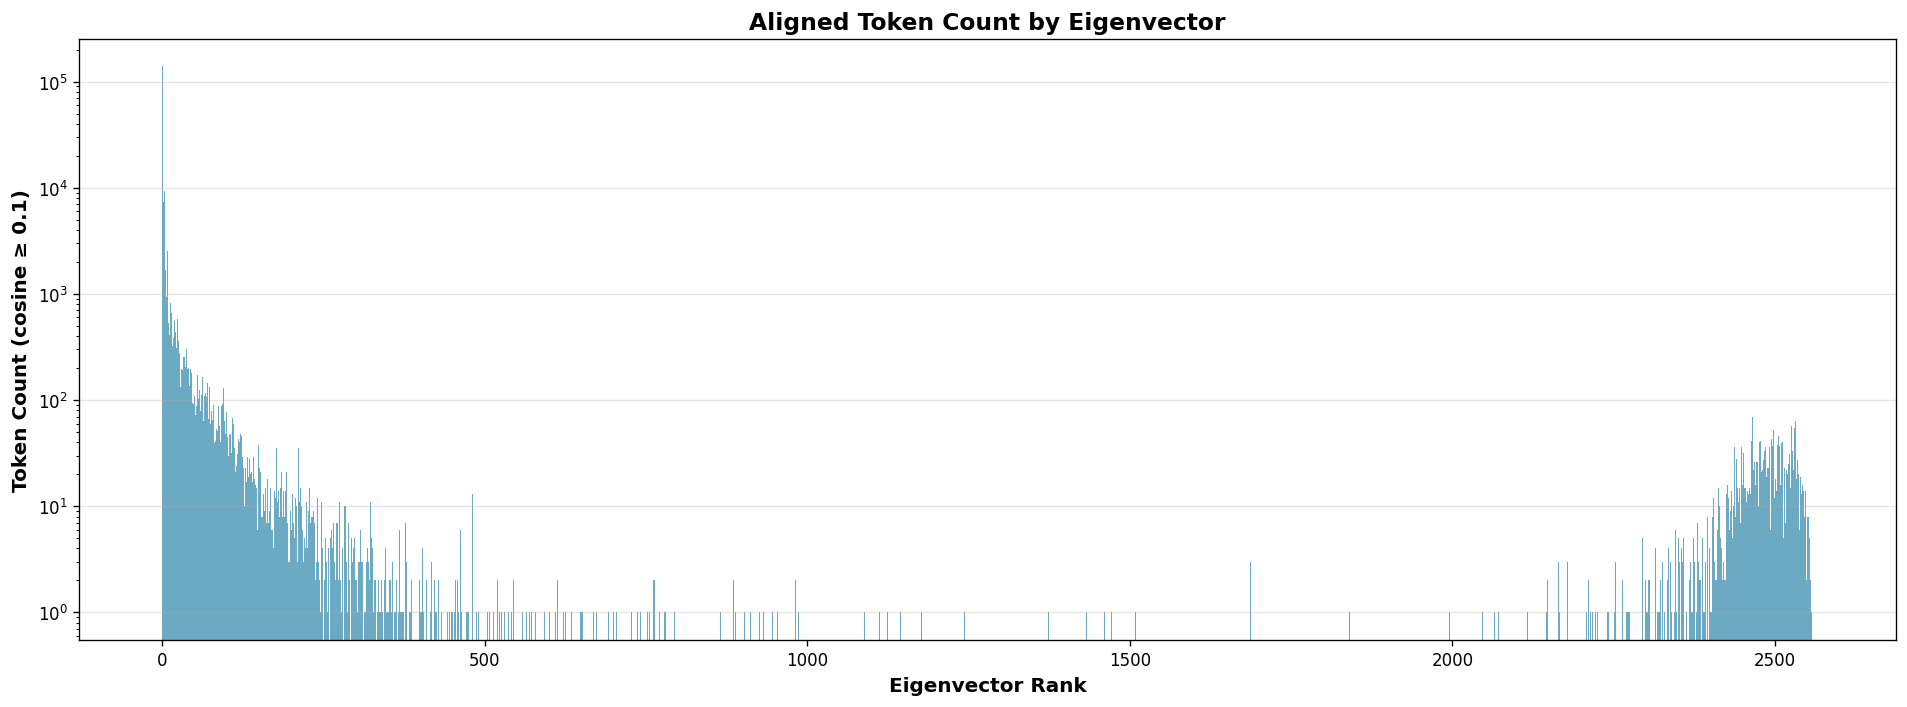

In [11]:
fig, ax = plt.subplots(figsize=(16, 6), dpi=120)

ax.bar(np.arange(hidden_dim), counts, width=1.0, color='#2E86AB', alpha=0.7)
ax.set_xlabel('Eigenvector Rank', fontsize=12, fontweight='bold')
ax.set_ylabel(f'Token Count (cosine ≥ {THRESHOLD})', fontsize=12, fontweight='bold')
ax.set_yscale('log')
ax.set_title(f'Aligned Token Count by Eigenvector', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()